In [76]:
from sympy import diff, lambdify, symbols, sqrt, cos
import numpy as np
import rebound
from scipy.integrate import odeint
from sympy import init_printing
init_printing()
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import FloatSlider

In [77]:
gamma, eta, Gamma, I, psi, phi = symbols("gamma, eta, Gamma, I, psi, phi")
H = Gamma**2/2 + gamma*I - cos(psi) - eta*cos(psi - phi)

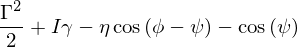

In [78]:
H

This is what I get for the Hamiltonian 5 if we drop the $I^2$ term, nondimensionalize the actions by the width of the $\cos{\psi}$ resonance, $\Delta\Gamma = \left(\frac{\mu D}{A}\right)^{1/2}$ and the time through $t' = \omega t$, with $\omega$ the frequency of small oscillations in the $\cos(\psi)$ resonance, $\omega = \left(\mu D A \right)^{1/2}$.  This cuts the number of parameters in half and should make it easier to see what's going on.  The new parameters are related to the ones in Murray & Holman (1997) as $\gamma = \left( \frac{\mu B^2}{D A} \right)^{1/2} \approx K^{-1/2}$, where K is the stochasticity parameter and $\eta = \frac{E}{D} \approx 1$.

# Calculate Hamilton's equations symbolically

In [79]:
var = (psi, phi, Gamma, I, gamma, eta)

In [80]:
Gammadot = lambdify(var, -diff(H, psi), 'numpy')
Idot = lambdify(var, -diff(H, phi), 'numpy')
psidot = lambdify(var, diff(H, Gamma), 'numpy')
phidot = lambdify(var, diff(H, I), 'numpy')

In [81]:
def diffeq(y, t, *params):
    psi, phi, Gamma, I = y
    v = np.concatenate((y, params))
    dydt = [psidot(*v), phidot(*v), Gammadot(*v), Idot(*v)]
    return dydt

# A simple integration

The integrate function takes a tuple with the initial conditions (in the order psi, phi, Gamma, I) and the parameters (gamma, eta) and plots psi vs Gamma.

In [84]:
def wrap(val):
    while val < -np.pi:
        val += 2*np.pi
    while val > np.pi:
        val -= 2*np.pi
    return val

npwrap = np.vectorize(wrap)

def integrate(y0, params):
    times = np.linspace(0, 100, 1000)
    sol = odeint(diffeq, y0, times, args=params)
    solpsi = npwrap(sol[:,0])
    solphi = npwrap(sol[:,1])
    solGamma = sol[:,2]
    solI = sol[:,3]
    
    fig, ax = plt.subplots(figsize=(15,10))
    #ax.set_title("Planet Mass = {0:.1e} solar masses".format(10**logmass), fontsize=24)
    ax.set_xlabel(r"$\psi$", fontsize=24)
    ax.set_ylabel(r"$\Gamma$", fontsize=24)
    
    
    ax.plot(solpsi, solGamma, '.')
    ax.set_aspect('equal')
    
    fig.show()

/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


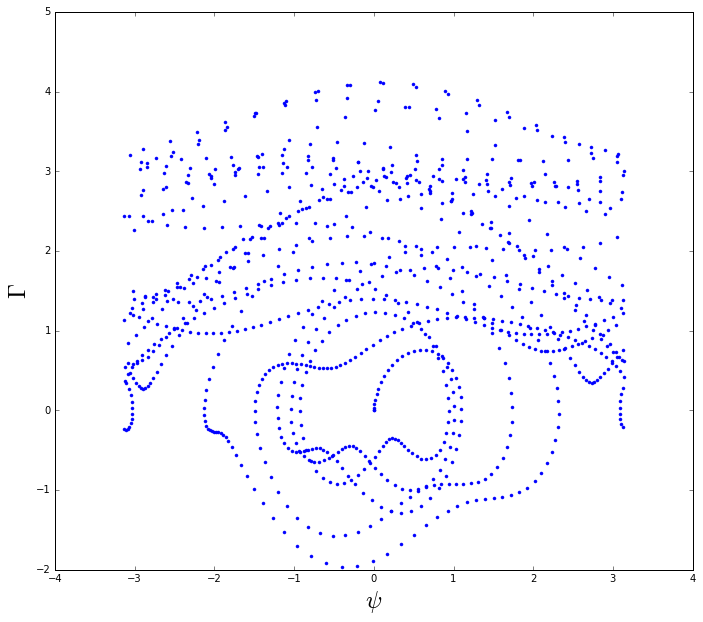

In [86]:
gamma = 2.
eta = 0.9
psi0 = 0.0
phi0 = 0.
Gamma0 = 0.
I0 = 0.

integrate((psi0, phi0, Gamma0, I0), (gamma, eta))